# Estudo de filiados dos partidos

## Importar bibliotecas e Conexão com o Google Drive

In [0]:
# Importa pandas e matplotlib
import pandas as pd
import matplotlib.pyplot as plt
plt.ion()

Liberando conexão com google Drive.

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Compartilhei um diretório no Google Drive com os arquivos de MG: https://drive.google.com/open?id=1KhhvWnAxNI1omxnNv_QqbV_vPxuFf13H

## Extração e Concatenação dos dataframes

#### Pega a lista de arquivos no Drive

In [0]:
#    Auto-iterate usando a sintaxe de consulta
#    https://developers.google.com/drive/v2/web/search-parameters
arquivos = drive.ListFile(
    {'q': "'1KhhvWnAxNI1omxnNv_QqbV_vPxuFf13H' in parents"}).GetList()

#### Definições do diretorio local (Colab)

In [0]:
import os
# armazenar os dados em um diretório local (colab) 
diretorio_local_download = os.path.expanduser('~/data')
try:
  os.makedirs(diretorio_local_download)
except: pass

#### Concatenar dataframes
Baixa os arquivos CSV para o diretório local do colab e cria uma lista de dataframes

In [5]:
frames = []
for arquivo in arquivos:
  #  Imprime nome e id do arquivo no Drive
  #print('Nome do arquivo : %s, id: %s' % (arquivo['title'], arquivo['id']))
  #  Pega o nome
  anome = os.path.join(diretorio_local_download, arquivo['title'])
  #  Create & download by id.
  arquivo_ = drive.CreateFile({'id': arquivo['id']})
  arquivo_.GetContentFile(anome)
  print('{}'.format(anome)+' ok')
  filiados_mg = pd.read_csv(anome,sep=';', encoding='latin-1')
  frames.append(filiados_mg)

/root/data/filiados_psol_mg.csv ok
/root/data/filiados_solidariedade_mg.csv ok
/root/data/filiados_pv_mg.csv ok
/root/data/filiados_ptc_mg.csv ok
/root/data/filiados_ptb_mg.csv ok
/root/data/filiados_pt_mg.csv ok
/root/data/filiados_psl_mg.csv ok
/root/data/filiados_psdb_mg.csv ok


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/root/data/filiados_psd_mg.csv ok
/root/data/filiados_psc_mg.csv ok


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/root/data/filiados_psb_mg.csv ok
/root/data/filiados_prtb_mg.csv ok
/root/data/filiados_prp_mg.csv ok
/root/data/filiados_pros_mg.csv ok
/root/data/filiados_prb_mg.csv ok
/root/data/filiados_pps_mg.csv ok
/root/data/filiados_pp_mg.csv ok
/root/data/filiados_pode_mg.csv ok
/root/data/filiados_pmn_mg.csv ok
/root/data/filiados_pl_mg.csv ok
/root/data/filiados_phs_mg.csv ok
/root/data/filiados_pdt_mg.csv ok
/root/data/filiados_pc_do_b_mg.csv ok
/root/data/filiados_patri_mg.csv ok
/root/data/filiados_mdb_mg.csv ok
/root/data/filiados_dem_mg.csv ok
/root/data/filiados_dc_mg.csv ok
/root/data/filiados_avante_mg.csv ok
/root/data/filiados_pmb_mg.csv ok
/root/data/filiados_pco_mg.csv ok
/root/data/filiados_pcb_mg.csv ok
/root/data/filiados_ppl_mg.csv ok
/root/data/filiados_novo_mg.csv ok
/root/data/filiados_rede_mg.csv ok
/root/data/filiados_pstu_mg.csv ok


A função concat() retorna um dataframe formado pela concatenação dos dataframes da lista

In [0]:
base = pd.concat(frames)

## Visão inicial dos dados

In [8]:
#  Tamanho do Dataframe Concatenado
len(base)

2330901

In [0]:
#  Cabeçalho
base.head()

,DATA DA EXTRACAO,HORA DA EXTRACAO,NUMERO DA INSCRICAO,NOME DO FILIADO,SIGLA DO PARTIDO,NOME DO PARTIDO,UF,CODIGO DO MUNICIPIO,NOME DO MUNICIPIO,ZONA ELEITORAL,SECAO ELEITORAL,DATA DA FILIACAO,SITUACAO DO REGISTRO,TIPO DO REGISTRO,DATA DO PROCESSAMENTO,DATA DA DESFILIACAO,DATA DO CANCELAMENTO,DATA DA REGULARIZACAO,MOTIVO DO CANCELAMENTO
0,28/09/2019,01:06:04,175537170281,ADRIANO DOS SANTOS CHAVES,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,47198,JOAÍMA,149,58,04/03/2007,REGULAR,OFICIAL,15/10/2011,NaN,NaN,NaN,NaN
1,28/09/2019,01:06:04,20195810281,JAIRO DE SOUZA BENTO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,48658,MONTES CLAROS,184,302,14/10/2005,CANCELADO,OFICIAL,13/04/2019,22/02/2008,22/02/2008,NaN,Judicial
2,28/09/2019,01:06:04,94092680213,ANDREIA DA CONCEICAO TOLENTINO E SOUZA,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,53430,SETE LAGOAS,263,285,30/09/2007,CANCELADO,OFICIAL,18/04/2017,10/11/2011,05/10/2011,NaN,A pedido do eleitor
3,28/09/2019,01:06:04,68188370248,IRANI ALVES PEIXOTO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,41335,BETIM,319,122,02/01/2006,REGULAR,OFICIAL,13/04/2019,NaN,NaN,NaN,NaN
4,28/09/2019,01:06:04,181601980221,JERDESOM LUIZ PEREIRA APOLINARIO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,48216,MATOZINHOS,174,21,16/04/2009,CANCELADO,OFICIAL,15/10/2016,NaN,09/11/2017,NaN,A pedido do eleitor


Partidos

In [0]:
base['SIGLA DO PARTIDO'].unique()

array(['PSOL', 'SOLIDARIEDADE', 'PV', 'PTC', 'PTB', 'PT', 'PSL', 'PSDB',
       'PSD', 'PSC', 'PSB', 'PRTB', 'PRP', 'PROS', 'PRB', 'PPS', 'PP',
       'PODE', 'PMN', 'PL', 'PHS', 'PDT', 'PC DO B', 'PATRI', 'MDB',
       'DEM', 'DC', 'AVANTE', 'PMB', 'PCO', 'PCB', 'PPL', 'NOVO', 'REDE',
       'PSTU'], dtype=object)

In [0]:
base['NOME DO PARTIDO'].unique()

array(['PARTIDO SOCIALISMO E LIBERDADE', 'SOLIDARIEDADE', 'PARTIDO VERDE',
       'PARTIDO TRABALHISTA CRISTÃO', 'PARTIDO TRABALHISTA BRASILEIRO',
       'PARTIDO DOS TRABALHADORES', 'PARTIDO SOCIAL LIBERAL',
       'PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA',
       'PARTIDO SOCIAL DEMOCRÁTICO', 'PARTIDO SOCIAL CRISTÃO',
       'PARTIDO SOCIALISTA BRASILEIRO',
       'PARTIDO RENOVADOR TRABALHISTA BRASILEIRO',
       'PARTIDO REPUBLICANO PROGRESSISTA',
       'PARTIDO REPUBLICANO DA ORDEM SOCIAL',
       'PARTIDO REPUBLICANO BRASILEIRO', 'PARTIDO POPULAR SOCIALISTA',
       'PARTIDO PROGRESSISTA', 'PODEMOS',
       'PARTIDO DA MOBILIZAÇÃO NACIONAL', 'PARTIDO LIBERAL',
       'PARTIDO HUMANISTA DA SOLIDARIEDADE',
       'PARTIDO DEMOCRÁTICO TRABALHISTA', 'PARTIDO COMUNISTA DO BRASIL',
       'Patriota', 'Movimento Democrático Brasileiro', 'DEMOCRATAS',
       'Democracia Cristã', 'AVANTE', 'PARTIDO DA MULHER BRASILEIRA',
       'PARTIDO DA CAUSA OPERÁRIA', 'PARTIDO COMUNISTA BRASILEIRO',

In [0]:
base

,DATA DA EXTRACAO,HORA DA EXTRACAO,NUMERO DA INSCRICAO,NOME DO FILIADO,SIGLA DO PARTIDO,NOME DO PARTIDO,UF,CODIGO DO MUNICIPIO,NOME DO MUNICIPIO,ZONA ELEITORAL,SECAO ELEITORAL,DATA DA FILIACAO,SITUACAO DO REGISTRO,TIPO DO REGISTRO,DATA DO PROCESSAMENTO,DATA DA DESFILIACAO,DATA DO CANCELAMENTO,DATA DA REGULARIZACAO,MOTIVO DO CANCELAMENTO
0,28/09/2019,01:06:04,175537170281,ADRIANO DOS SANTOS CHAVES,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,47198,JOAÍMA,149,58,04/03/2007,REGULAR,OFICIAL,15/10/2011,NaN,NaN,NaN,NaN
1,28/09/2019,01:06:04,20195810281,JAIRO DE SOUZA BENTO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,48658,MONTES CLAROS,184,302,14/10/2005,CANCELADO,OFICIAL,13/04/2019,22/02/2008,22/02/2008,NaN,Judicial
2,28/09/2019,01:06:04,94092680213,ANDREIA DA CONCEICAO TOLENTINO E SOUZA,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,53430,SETE LAGOAS,263,285,30/09/2007,CANCELADO,OFICIAL,18/04/2017,10/11/2011,05/10/2011,NaN,A pedido do eleitor
3,28/09/2019,01:06:04,68188370248,IRANI ALVES PEIXOTO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,41335,BETIM,319,122,02/01/2006,REGULAR,OFICIAL,13/04/2019,NaN,NaN,NaN,NaN
4,28/09/2019,01:06:04,181601980221,JERDESOM LUIZ PEREIRA APOLINARIO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,48216,MATOZINHOS,174,21,16/04/2009,CANCELADO,OFICIAL,15/10/2016,NaN,09/11/2017,NaN,A pedido do eleitor
5,28/09/2019,01:06:04,64768960213,GERALDO MAGELA TIBURCIO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,53732,TIMÓTEO,98,62,21/09/2009,CANCELADO,OFICIAL,14/04/2018,03/06/2013,03/06/2013,NaN,A pedido do eleitor
6,28/09/2019,01:06:04,170246130221,WALACE DA SILVA LOPES,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,47333,JUIZ DE FORA,349,335,12/01/2006,REGULAR,OFICIAL,14/04/2018,NaN,NaN,NaN,NaN
7,28/09/2019,01:06:04,29673250299,MARLI OLEGARIO DOS SANTOS,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,46256,IPATINGA,131,3,12/01/2006,REGULAR,OFICIAL,15/04/2016,NaN,NaN,NaN,NaN
8,28/09/2019,01:06:04,121304580221,HELENA OLIVEIRA DA SILVA,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,54038,UBERLÂNDIA,279,317,30/01/2006,CANCELADO,OFICIAL,14/04/2018,05/04/2011,18/05/2012,NaN,Judicial
9,28/09/2019,01:06:04,120451170248,MARCIO ROBERTO GONCALVES DE ARAUJO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,50911,RIBEIRÃO DAS NEVES,286,206,09/01/2006,REGULAR,OFICIAL,14/04/2018,NaN,NaN,NaN,NaN


## Preparando os dados

Manter a base e trabalhar em novas variáveis com o dataset

In [0]:
df = pd.DataFrame(base)

### Criar um dataframe (regulares_mg) com os dados dos registros regulares.

Filtrando com a função where()

In [0]:
filter = df["SITUACAO DO REGISTRO"]=="REGULAR"
regulares_mg = df.where(filter)
regulares_mg

,DATA DA EXTRACAO,HORA DA EXTRACAO,NUMERO DA INSCRICAO,NOME DO FILIADO,SIGLA DO PARTIDO,NOME DO PARTIDO,UF,CODIGO DO MUNICIPIO,NOME DO MUNICIPIO,ZONA ELEITORAL,SECAO ELEITORAL,DATA DA FILIACAO,SITUACAO DO REGISTRO,TIPO DO REGISTRO,DATA DO PROCESSAMENTO,DATA DA DESFILIACAO,DATA DO CANCELAMENTO,DATA DA REGULARIZACAO,MOTIVO DO CANCELAMENTO
0,28/09/2019,01:06:04,175537170281,ADRIANO DOS SANTOS CHAVES,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,47198.0,JOAÍMA,149.0,58.0,04/03/2007,REGULAR,OFICIAL,15/10/2011,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28/09/2019,01:06:04,68188370248,IRANI ALVES PEIXOTO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,41335.0,BETIM,319.0,122.0,02/01/2006,REGULAR,OFICIAL,13/04/2019,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,28/09/2019,01:06:04,170246130221,WALACE DA SILVA LOPES,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,47333.0,JUIZ DE FORA,349.0,335.0,12/01/2006,REGULAR,OFICIAL,14/04/2018,NaN,NaN,NaN,NaN
7,28/09/2019,01:06:04,29673250299,MARLI OLEGARIO DOS SANTOS,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,46256.0,IPATINGA,131.0,3.0,12/01/2006,REGULAR,OFICIAL,15/04/2016,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,28/09/2019,01:06:04,120451170248,MARCIO ROBERTO GONCALVES DE ARAUJO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,50911.0,RIBEIRÃO DAS NEVES,286.0,206.0,09/01/2006,REGULAR,OFICIAL,14/04/2018,NaN,NaN,NaN,NaN


Vamos remover do dataframe regulares_mg as linhas Not a Number (NaN). Estas linhas correpondem aos registros em que a coluna "SITUACAO DO REGISTRO" continha informorção diferente da string "REGULAR". A função where não expurga as linhas, apenas remove as informações do df. Assim, com a função dropna, o nosso Dataframe terá apenas as linhas dos registros regulares.

In [0]:
regulares_mg = regulares_mg.dropna(axis=0, how='all')
regulares_mg

,DATA DA EXTRACAO,HORA DA EXTRACAO,NUMERO DA INSCRICAO,NOME DO FILIADO,SIGLA DO PARTIDO,NOME DO PARTIDO,UF,CODIGO DO MUNICIPIO,NOME DO MUNICIPIO,ZONA ELEITORAL,SECAO ELEITORAL,DATA DA FILIACAO,SITUACAO DO REGISTRO,TIPO DO REGISTRO,DATA DO PROCESSAMENTO,DATA DA DESFILIACAO,DATA DO CANCELAMENTO,DATA DA REGULARIZACAO,MOTIVO DO CANCELAMENTO
0,28/09/2019,01:06:04,175537170281,ADRIANO DOS SANTOS CHAVES,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,47198.0,JOAÍMA,149.0,58.0,04/03/2007,REGULAR,OFICIAL,15/10/2011,NaN,NaN,NaN,NaN
3,28/09/2019,01:06:04,68188370248,IRANI ALVES PEIXOTO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,41335.0,BETIM,319.0,122.0,02/01/2006,REGULAR,OFICIAL,13/04/2019,NaN,NaN,NaN,NaN
6,28/09/2019,01:06:04,170246130221,WALACE DA SILVA LOPES,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,47333.0,JUIZ DE FORA,349.0,335.0,12/01/2006,REGULAR,OFICIAL,14/04/2018,NaN,NaN,NaN,NaN
7,28/09/2019,01:06:04,29673250299,MARLI OLEGARIO DOS SANTOS,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,46256.0,IPATINGA,131.0,3.0,12/01/2006,REGULAR,OFICIAL,15/04/2016,NaN,NaN,NaN,NaN
9,28/09/2019,01:06:04,120451170248,MARCIO ROBERTO GONCALVES DE ARAUJO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,50911.0,RIBEIRÃO DAS NEVES,286.0,206.0,09/01/2006,REGULAR,OFICIAL,14/04/2018,NaN,NaN,NaN,NaN
11,28/09/2019,01:06:04,66306730264,LUIZ FERNANDO RODRIGUES GOMES,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,41238.0,BELO HORIZONTE,30.0,262.0,04/01/2006,REGULAR,OFICIAL,16/10/2018,NaN,NaN,NaN,NaN
12,28/09/2019,01:06:04,153879870248,MARIA APARECIDA ANDRADE SILVA,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,46337.0,ITABIRA,132.0,108.0,02/10/2005,REGULAR,OFICIAL,18/04/2017,NaN,NaN,NaN,NaN
14,28/09/2019,01:06:04,97407350264,FABIO FAIAD BOTTINI,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,41238.0,BELO HORIZONTE,26.0,166.0,11/04/2006,REGULAR,OFICIAL,14/10/2017,NaN,NaN,NaN,NaN
15,28/09/2019,01:06:04,13092170604,WILSON JOSE DE OLIVEIRA,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,41238.0,BELO HORIZONTE,26.0,87.0,24/05/2006,REGULAR,OFICIAL,16/10/2018,NaN,NaN,NaN,NaN
16,28/09/2019,01:06:04,121134920205,JAIRO PEREIRA DE CAMARGOS,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,49590.0,PATOS DE MINAS,330.0,160.0,04/04/2007,REGULAR,OFICIAL,15/04/2016,NaN,NaN,NaN,NaN


### Verificar as filiações regulares por partido em MG.

In [0]:
#### Contagem simples dos registros de filiações regulares por partido em MG.
cols = ['NUMERO DA INSCRICAO' , 'SIGLA DO PARTIDO']
simplecount_regulares_mg = pd.DataFrame(regulares_mg[cols].groupby('SIGLA DO PARTIDO').count())
simplecount_regulares_mg

,NUMERO DA INSCRICAO
SIGLA DO PARTIDO,
AVANTE,23138
DC,19713
DEM,143654
MDB,219794
NOVO,4227
PATRI,7439
PC DO B,31602
PCB,361
PCO,708


Vamos investigar se há possíveis erros de base, contando apenas numeros de registro únicos por partido, assim, se os números se manterem, consideraremos que não há registros repetidos para os números de inscrição.

In [0]:
distinct_regulares_mg = pd.DataFrame(regulares_mg[cols].groupby('SIGLA DO PARTIDO')['NUMERO DA INSCRICAO'].nunique())
distinct_regulares_mg

,NUMERO DA INSCRICAO
SIGLA DO PARTIDO,
AVANTE,23128
DC,19713
DEM,143616
MDB,219743
NOVO,4227
PATRI,7439
PC DO B,31548
PCB,361
PCO,708


Verificamos que há diferença na contagem simples de registros regulares e na contagem considerando apenas registros únicos, o que pode indicar possíveis inconsistências na informação disponibilizada pelo TSE, uma vez que uma pessoa não pode se filiar mais de uma vez no mesmo partido e nem estar como regular em mais de um partido. Para fins de estudos, o df distinct_regulares_mg será considerado o mais adequado.

## Algumas visualizações básicas

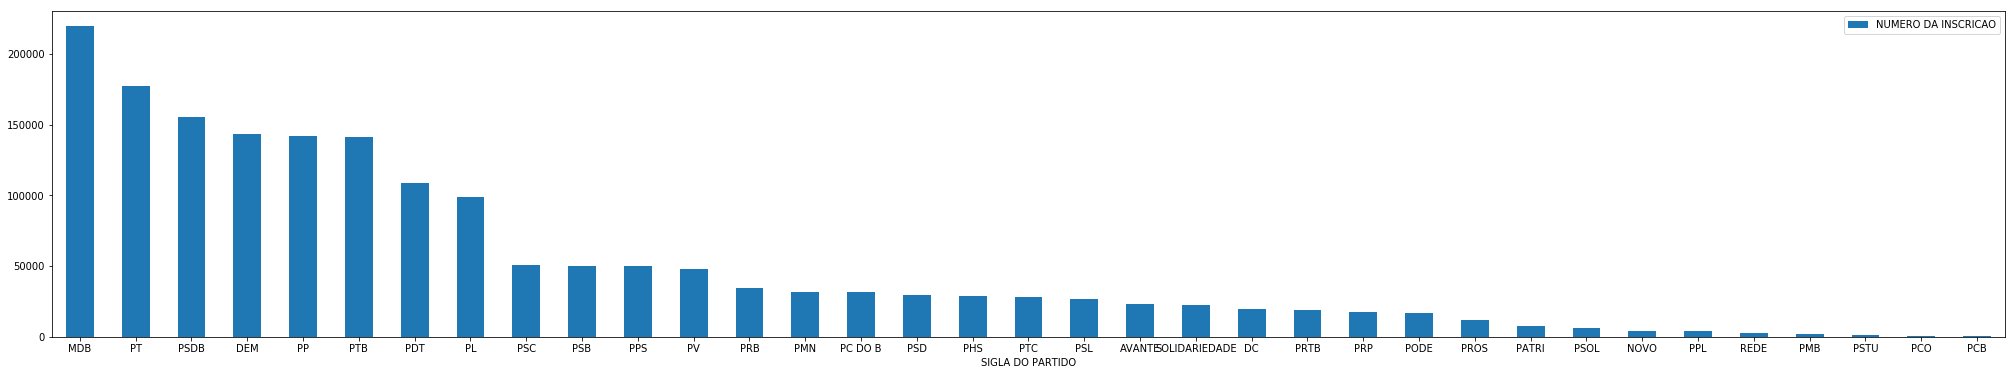

In [0]:
# Gráfico de barras, quantidade de filiados regulares por partido em MG, em ordem decrescente.
distinct_regulares_mg.sort_values('NUMERO DA INSCRICAO', ascending=False).plot.bar(y='NUMERO DA INSCRICAO', rot=0, figsize=(35,6))

#### Pizza

<function matplotlib.pyplot.show>

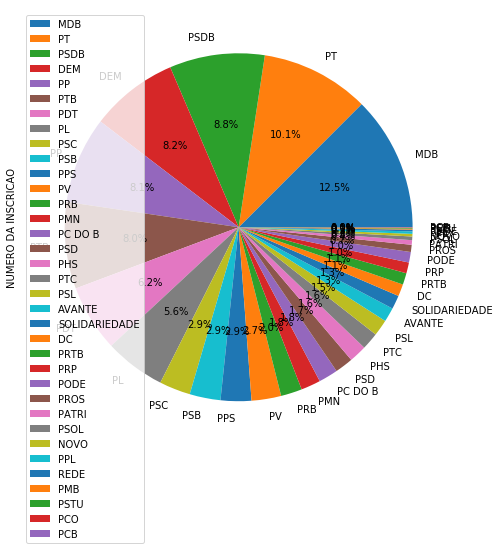

In [0]:
# Gráfico de Pizza, percentual de filiados por partido em MG
distinct_regulares_mg.sort_values('NUMERO DA INSCRICAO', ascending=False).plot.pie(y='NUMERO DA INSCRICAO',
                      autopct='%1.1f%%',
                      figsize=(8,8))
plt.show

#### Experimentando a bibiloteca Plotly

In [0]:
import plotly.express as px
#data_canada = px.data.gapminder().query("country == 'Brazil'")
fig = px.bar(distinct_regulares_mg, y='NUMERO DA INSCRICAO')
fig.show()

#### Gráfico de barras do Plotly (Reindexado e reordenado)

##### Transformações no dataframe

Iremos manter o conteúdo do df ordenado pela quantidade de filiados por partido (Decrescente).

Quando fizemos o Group by, a sigla do partido passou a ser o indice do dataframe, o que não  e não ajuda com algumas bibliotecas de visualizações, como é o caso da Plotly, portanto, vamos reindexar o dataframe de filiados regulares distintos, inserindo um indice numérico.


In [0]:
# Ordenação do df
distinct_regulares_mg = distinct_regulares_mg.sort_values('NUMERO DA INSCRICAO', ascending=False)
# reindexação do dataframe, com indice numérico sequencial (ID)
distinct_regulares_mg = pd.DataFrame(distinct_regulares_mg.reset_index())
distinct_regulares_mg

##### Exibe o gáfico de barras

In [0]:
fig = px.bar(distinct_regulares_mg, x='SIGLA DO PARTIDO', y='NUMERO DA INSCRICAO')
fig.show()

## Governadores de MG

### Para este estudo iremos considerar o governadores de MG a partir da 6º república (1985)

Lista dos governadores: https://pt.wikipedia.org/wiki/Lista_de_governadores_de_Minas_Gerais

#### Hélio Garcia

![alt text](https://upload.wikimedia.org/wikipedia/commons/2/23/H%C3%A9lio_Carvalho_Garcia_como_Deputado_Federal_1967-1971.jpg)

De acordo com o Wikipedia:


*   Seu nome completo é Hélio Carvalho Garcia
*   Faleceu em junho de 2016
*   Foi filiado aos seguintes partidos:
      UDN (1957–1966)
      ARENA (1966–1979)
      PP (1979–1981)
      PMDB (1981–1990)
      PRS (1990–1992)
      PTB (1992–2016)
      

Fonte: https://pt.wikipedia.org/wiki/H%C3%A9lio_Garcia

In [12]:
filter = df["NOME DO FILIADO"]=="HELIO CARVALHO GARCIA"
governador_mg = df.where(filter).dropna(axis=0, how='all')
governador_mg

,DATA DA EXTRACAO,HORA DA EXTRACAO,NUMERO DA INSCRICAO,NOME DO FILIADO,SIGLA DO PARTIDO,NOME DO PARTIDO,UF,CODIGO DO MUNICIPIO,NOME DO MUNICIPIO,ZONA ELEITORAL,SECAO ELEITORAL,DATA DA FILIACAO,SITUACAO DO REGISTRO,TIPO DO REGISTRO,DATA DO PROCESSAMENTO,DATA DA DESFILIACAO,DATA DO CANCELAMENTO,DATA DA REGULARIZACAO,MOTIVO DO CANCELAMENTO
175981,28/09/2019,01:07:16,57508820281,HELIO CARVALHO GARCIA,PTB,PARTIDO TRABALHISTA BRASILEIRO,MG,41238.0,BELO HORIZONTE,33.0,97.0,07/01/1994,CANCELADO,OFICIAL,14/10/2017,27/03/2017,27/03/2017,NaN,NaN


Assim, verificamos que as informações do Wikipedia não coincidem, exatamente, com as do dataframe. Sabemos que o dataframe contém apenas dados dos partidos existentes, ou seja, não contém os dados dos partidos extintos, sendo assim, era esperado que faltassem os dados para alguns partidos, porém partidos como PP e PMDB existem até os dias de hoje e deveriam constar nos resultados.

#### Newton Cardoso

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/Newton_Cardoso.JPG/200px-Newton_Cardoso.JPG)

De acordo com o Wikipedia:


*   Seu nome completo é Newton Cardoso?
*   Um dos fundadores de PMDB (1965 - Oposição - Ditadura Militar)
*   Não se filiou a outros partidos
      

Fonte: https://pt.wikipedia.org/wiki/Newton_Cardoso

In [13]:
filter = df["NOME DO FILIADO"]=="NEWTON CARDOSO"
governador_mg = df.where(filter).dropna(axis=0, how='all')
governador_mg

,DATA DA EXTRACAO,HORA DA EXTRACAO,NUMERO DA INSCRICAO,NOME DO FILIADO,SIGLA DO PARTIDO,NOME DO PARTIDO,UF,CODIGO DO MUNICIPIO,NOME DO MUNICIPIO,ZONA ELEITORAL,SECAO ELEITORAL,DATA DA FILIACAO,SITUACAO DO REGISTRO,TIPO DO REGISTRO,DATA DO PROCESSAMENTO,DATA DA DESFILIACAO,DATA DO CANCELAMENTO,DATA DA REGULARIZACAO,MOTIVO DO CANCELAMENTO
16552,28/09/2019,00:57:41,7124710264,NEWTON CARDOSO,MDB,Movimento Democrático Brasileiro,MG,43710.0,CONTAGEM,90.0,7.0,05/11/1981,REGULAR,OFICIAL,14/04/2018,NaN,NaN,NaN,NaN


Aqui a única divergência é a data de filiação.

#### Eduardo Azeredo

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Eduardo_azeredo.jpg/210px-Eduardo_azeredo.jpg)

De acordo com o Wikipedia:

Seu nome completo é Eduardo Brandão de Azeredo
Filiou-se apenas ao PSDB, em 1988

https://pt.wikipedia.org/wiki/Eduardo_Azeredo

In [15]:
filter = df["NOME DO FILIADO"]=="EDUARDO BRANDAO DE AZEREDO"
governador_mg = df.where(filter).dropna(axis=0, how='all')
governador_mg

,DATA DA EXTRACAO,HORA DA EXTRACAO,NUMERO DA INSCRICAO,NOME DO FILIADO,SIGLA DO PARTIDO,NOME DO PARTIDO,UF,CODIGO DO MUNICIPIO,NOME DO MUNICIPIO,ZONA ELEITORAL,SECAO ELEITORAL,DATA DA FILIACAO,SITUACAO DO REGISTRO,TIPO DO REGISTRO,DATA DO PROCESSAMENTO,DATA DA DESFILIACAO,DATA DO CANCELAMENTO,DATA DA REGULARIZACAO,MOTIVO DO CANCELAMENTO
146846,28/09/2019,01:05:09,50886450221,EDUARDO BRANDAO DE AZEREDO,PSDB,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,MG,41238.0,BELO HORIZONTE,35.0,6.0,25/06/1988,CANCELADO,OFICIAL,13/04/2019,NaN,08/05/2019,NaN,A pedido do eleitor


Desfiliou-se do PSDB este ano.

#### Itamar Franco

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Itamar_Augusto_Cautiero_Franco.gif/200px-Itamar_Augusto_Cautiero_Franco.gif)

De acordo com o Wikipedia:

*   Seu nome completo é Itamar Augusto Cautiero Franco
*   Faleceu em Julho de 2011
*   Foi filiado aos seguintes partidos:
    PPS (2009 – 2011)
    PMDB (1992 – 2009)
    PRN (1989 – 1992)
    PL (1986 – 1989)
    MDB (1964 – 1986)
    PTB (1955 – 1964)

https://pt.wikipedia.org/wiki/Itamar_Franco

In [16]:
filter = df["NOME DO FILIADO"]=="ITAMAR AUGUSTO CAUTIERO FRANCO"
governador_mg = df.where(filter).dropna(axis=0, how='all')
governador_mg

,DATA DA EXTRACAO,HORA DA EXTRACAO,NUMERO DA INSCRICAO,NOME DO FILIADO,SIGLA DO PARTIDO,NOME DO PARTIDO,UF,CODIGO DO MUNICIPIO,NOME DO MUNICIPIO,ZONA ELEITORAL,SECAO ELEITORAL,DATA DA FILIACAO,SITUACAO DO REGISTRO,TIPO DO REGISTRO,DATA DO PROCESSAMENTO,DATA DA DESFILIACAO,DATA DO CANCELAMENTO,DATA DA REGULARIZACAO,MOTIVO DO CANCELAMENTO
10689,28/09/2019,01:03:20,49957780230,ITAMAR AUGUSTO CAUTIERO FRANCO,PPS,PARTIDO POPULAR SOCIALISTA,MG,47333.0,JUIZ DE FORA,152.0,29.0,06/07/2009,CANCELADO,OFICIAL,14/04/2018,NaN,02/07/2011,NaN,Judicial
49920,28/09/2019,00:57:41,49957780230,ITAMAR AUGUSTO CAUTIERO FRANCO,MDB,Movimento Democrático Brasileiro,MG,47333.0,JUIZ DE FORA,152.0,29.0,16/09/2003,CANCELADO,OFICIAL,14/04/2018,06/07/2006,06/07/2006,NaN,A pedido do eleitor


Aqui, mais uma vez, verificamos divergencia das informações do Wikipedia com os dados do TSE, além da já conhecida ausencia de informações de partidos extintos, temos divergências quanto as datas da filiação e da desfiliação (ou cancelamento)